In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
%cd /content/drive/MyDrive/Github
%cd 'soil-physics-theory'
%cd 'content/chapter-5'

Mounted at /content/drive
/content/drive/MyDrive/Github
/content/drive/MyDrive/Github/soil-physics-theory
/content/drive/MyDrive/Github/soil-physics-theory/content/chapter-5


5.1
Use the program PSP_travelTimeAnalysis to compute the water content of the soil sample dataTDRSoil.dat. Change the values of bulk density, temperature and solid-phase dielectric permittivity to investigate the effects on the computed water content by using the dielectric mixing model.

In [5]:
cd PSP_travelTimeAnalysis_NEW/

[Errno 2] No such file or directory: 'PSP_travelTimeAnalysis_NEW/'
/content/drive/MyDrive/Github/soil-physics-theory/content/chapter-5/PSP_travelTimeAnalysis_NEW


Soil temperature (C):25
Bulk density (kg/m^3):1000
Permittivity of soil solids (-): 4
File name:TDR/water2.dat
Water content from mixing model
1.0824913011953767


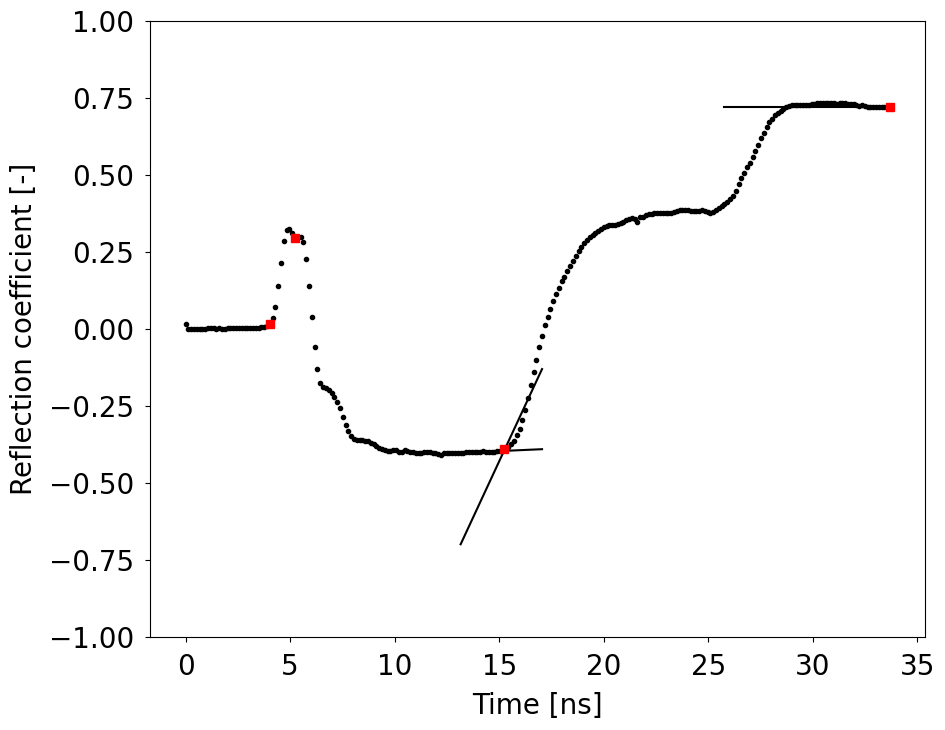

<Figure size 640x480 with 0 Axes>

In [7]:
run main.py

### 5.2 If the temperature of the soil liquid phase increases, does the bulk dielectric permittivity increase or decrease? What effect would this change have on soil water content computation?

In [8]:
temps = range(0, 91, 30)

for i in temps:
  print("temperature = ",i)
  print("permiativity= ", getLiquidPermittivity(i))

temperature =  0
permiativity=  87.53086650000002
temperature =  30
permiativity=  76.7418267
temperature =  60
permiativity=  65.9527869
temperature =  90
permiativity=  55.16374710000001


### 5.3 Compute the matric water potential for water in a saturated pore 10 µm in diameter, at 20 ◦C. The surface tension and liquid density at this temperature are 72.75 × 10–3 N m–1 and 1027.8 kg m–3, respectively

In [9]:
# Given constants
gamma = 72.75e-3  # Surface tension of water (N/m)
theta = 0         # Contact angle (degrees)
diameter = 10e-6  # Diameter of the pore (m)

# Compute radius from diameter
radius = diameter / 2

# Compute matric potential
matric_potential = (2 * gamma * np.cos(np.deg2rad(theta))) / radius

print("Matric water potential:", matric_potential, "Pa")

Matric water potential: 29099.999999999996 Pa


### 5.4 By using the integration presented in the program PSP_columnWaterContent.py, compute the total amount of soil water in a clay soil for a profile that is 1 m deep. Use the parameters presented in Table 5.4

In [10]:
alpha=0.17 #kgJ^–1
n=1.16
m=1-(1/n)
AirEP=-3.3 #air entry potential  Jkg^–1
thetaR=0.07 #m/m^3
thetaS=0.5 #m/m^3
depth=1 #
Se = 1. / (1. + (alpha * abs(AirEP))**n)**m
print ("water_content:","%.2f" %Se, "m/m3")

water_content: 0.94 m/m3


## Derivatives of Campbell's and van Genuchten's Equations

To derive the capacity of Campbell's and van Genuchten's equations, we need to compute the derivatives of the respective functions with respect to water potential.

### Campbell's Equation

Campbell's equation describes the hydraulic conductivity (K) of soils as a function of water potential (Ψ). It is given by:

\[ K(\Psi) = K_s \exp\left( -\alpha |\Psi|^n \right) \]

To find the derivative of K with respect to Ψ, we differentiate the equation:

\[ \frac{dK}{d\Psi} = -\alpha n K_s |\Psi|^{n-1} \exp\left( -\alpha |\Psi|^n \right) \]

This derivative represents the capacity of Campbell's equation.

### van Genuchten's Equation

van Genuchten's equation describes the volumetric water content (θ) of soils as a function of water potential (Ψ). It is given by:

\[ \theta(\Psi) = \theta_r + \frac{{\theta_s - \theta_r}}{{\left(1 + \left(\frac{{|\Psi|}}{{\alpha}}\right)^n\right)^m}} \]

The derivative of θ with respect to Ψ can be found using the chain rule:

\[ \frac{d\theta}{d\Psi} = \frac{{-n \alpha \left( \theta_s - \theta_r \right) |\Psi|^{n-1}}}{{\left(1 + \left(\frac{{|\Psi|}}{{\alpha}}\right)^n\right)^{m+1}}} \]

This derivative represents the capacity of van Genuchten's equation.


## Problem 5.6
**Compute the water content at field capacity (assume ψFC = –33 J kg–1), and permanent wilting point (assume ψPWP = –1500 J kg–1) using van Genuchten’s equation for a soil having the following parameters: α = 0.15, n = 1.35, θr = 0.01 and θs = 0.46. The units of water potential are J kg–1. Plant available water is assumed to be the difference between these values. Compute the plant available water of the soil.**

In [11]:
# Given van Genuchten parameters
alpha = 0.15   # Alpha (1/m)
n = 1.35      # n
theta_r = 0.01  # Residual water content
theta_s = 0.46  # Saturated water content

# Given water potentials (J/kg)
psi_FC = -33   # Field capacity
psi_PWP = -1500  # Permanent wilting point

# Function to compute water content using van Genuchten's equation
def van_genuchten(psi, alpha, n, theta_r, theta_s):
    m = 1 - (1 / n)
    theta = theta_r + (theta_s - theta_r) / (1 + (alpha * abs(psi)) ** n) ** m
    return theta

# Compute water content at field capacity and permanent wilting point
theta_FC = van_genuchten(psi_FC, alpha, n, theta_r, theta_s)
theta_PWP = van_genuchten(psi_PWP, alpha, n, theta_r, theta_s)

# Compute plant available water
PAW = theta_FC - theta_PWP

print("Water content at field capacity:", theta_FC)
print("Water content at permanent wilting point:", theta_PWP)
print("Plant available water:", PAW)


Water content at field capacity: 0.2599204483672994
Water content at permanent wilting point: 0.07758860497726532
Plant available water: 0.18233184339003405


### Derivation of Capacity for Campbell's Equation



Derivation of the van Genuchten’s equation by computing the derivatives of the two functions with respect to ψ:

d/dθ (θ_r + (θ_s - θ_r) (1 + (αψ)^n) - m)

= dψ/dθ (θ_r + (θ_s - θ_r) (1 + (αψ)^n) - m)

= (θ_s - θ_r) * dψ/d (1 + (αψ)^n) - m

Using the chain rule, we get:

= (θ_s - θ_r) * (-m) * (1 + (αψ)^n)^(-m-1) * dψ/d (1 + (αψ)^n)

= - (θ_s - θ_r) * (αψ)^n * (1 + (αψ)^n)^(-m-1) * dψ/d (1 + (αψ)^n)

Differentiating 1 + (αψ)^n, we obtain:

= - (θ_s - θ_r) * (αψ)^n * (1 + (αψ)^n)^(-m-1) * nαn(αψ)^(n-1)

= - mnα(θ_s - θ_r) (αψ)^(n-1) (1 + (αψ)^n)^(-m-1)

Therefore, the full differentiation of (θ_r + (θ_s - θ_r) (1 + (αψ)^n) - m) with respect to ψ is:

= - mnα(θ_s - θ_r) (αψ)^(n-1) (1 + (αψ)^n)^(-m-1)